In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline


In [2]:
data = pd.read_excel("anechoic_3200rpm.xlsx")

In [3]:
# find negative start point
val = data.crank_angle[0]

print("First value ", val)

# Shift the first angle to 0 degrees to then convert to time
if val < 0:
    data.crank_angle = data.crank_angle.apply(lambda x: x - val)

First value  -94.0


In [4]:
# Now use engine speed to convert crank angle to time
rpm = 3200
rps = rpm/60
seconds_per_rev = 1/rps
data["time"] = data.crank_angle.apply(lambda x: (x/360)*seconds_per_rev)
data.head()

,crank_angle,total_pressure,boundary_velocity,time
0,0.0,2.816456,7.030225,0.000000
1,1.0,2.815955,6.921807,0.000052
2,2.0,2.815534,6.806837,0.000104
3,3.0,2.815148,6.690744,0.000156
4,4.0,2.814749,6.578897,0.000208


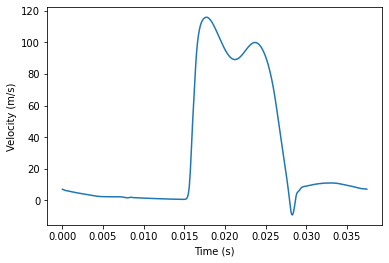

In [5]:
# Plot velocity against time just for viewing. 
velocity = data.boundary_velocity
time = data.time
fig = plt.figure()
plt.plot(time, velocity)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.show()

In [8]:
x = time
y = velocity
f2 = InterpolatedUnivariateSpline(x, y)
#Get dervative
der = []
for i in range(len(y)):

    h = 1e-4
    der.append( ( f2(x[i]+h)-f2(x[i]-h) )/(2*h) )
der = np.array(der)  

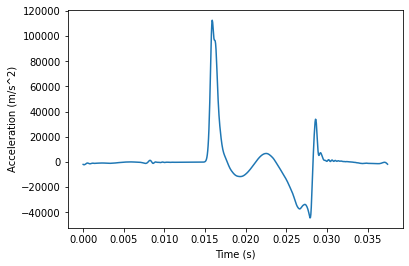

In [9]:
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.plot(time, der)

In [12]:
# Add the acceleration to the dataframe
data["acceleration"] = der

# Now convert the crank angle back
if data.crank_angle[0] > -90:
    data.crank_angle = data.crank_angle.apply(lambda x: x + val)
data.head()

,crank_angle,total_pressure,boundary_velocity,time,acceleration
0,-94.0,2.816456,7.030225,0.000000,-1919.801198
1,-93.0,2.815955,6.921807,0.000052,-2097.819119
2,-92.0,2.815534,6.806837,0.000104,-2171.775309
3,-91.0,2.815148,6.690744,0.000156,-2143.396717
4,-90.0,2.814749,6.578897,0.000208,-2018.456955


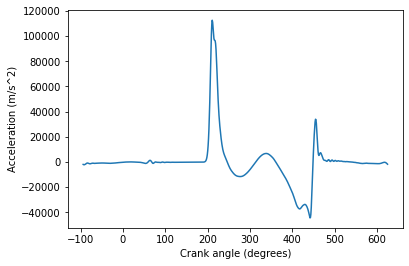

In [13]:
plt.xlabel("Crank angle (degrees)")
plt.ylabel("Acceleration (m/s^2)")
plt.plot(data.crank_angle, data.acceleration)
plt.savefig("acceleration_crankangle_anechoic_3200rpm.png")
